<a href="https://colab.research.google.com/github/Jeder14/TelecomX_challenge_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [623]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [624]:
url = 'https://raw.githubusercontent.com/Jeder14/TelecomX_challenge_parte2/refs/heads/main/Data/datos_limpios.csv'
df = pd.read_csv(url)
df.sample(10)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
506,0722-SVSFK,0.0,Female,0,0,0,7,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,100.40,715.00,3.30
2952,4098-NAUKP,0.0,Male,1,1,1,68,1,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,84.65,5683.60,2.78
1475,2115-BFTIW,1.0,Male,0,0,0,25,1,No,Fiber optic,...,No,No,No,No,Month-to-month,0,Mailed check,70.95,1767.35,2.33
5447,7460-ITWWP,0.0,Female,1,1,0,45,1,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,1,Electronic check,86.10,3861.45,2.83
365,0524-IAVZO,1.0,Female,0,1,0,30,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.00,2624.25,2.80
6160,8433-WXGNA,1.0,Male,0,0,0,2,1,No,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,75.70,189.20,2.49
1957,2778-OCLGR,1.0,Male,1,1,0,24,0,No phone service,DSL,...,No,No,No,Yes,Month-to-month,0,Bank transfer (automatic),39.10,971.30,1.29
613,0872-CASZJ,0.0,Male,0,1,0,59,1,Yes,DSL,...,No,Yes,No,Yes,One year,1,Mailed check,69.10,4096.90,2.27
5307,7246-ZGQDF,0.0,Female,0,0,1,1,1,No,DSL,...,No,Yes,No,No,Month-to-month,0,Electronic check,54.50,54.50,1.79
422,0607-MVMGC,0.0,Male,0,1,1,45,1,Yes,DSL,...,Yes,No,Yes,Yes,One year,0,Credit card (automatic),78.75,3600.65,2.59


In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   float64
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   int64  
 5   dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   int64  
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [626]:
df.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total',
       'cuentas_diarias'],
      dtype='object')

## Cambio de nombre de las columnas

In [627]:
df.rename(columns = {
    'customerid':'identificacion','churn':'evasion', 'gender':'genero', 'seniorcitizen':'adulto_mayor', 'partner':'tiene_pareja', 'dependents':'tiene_dependientes', 'tenure':'contrato_cliente',
       'phoneservice':'servicio_telefonico', 'multiplelines':'linea_telefonica', 'internetservice':'proovedor_internet', 'onlinesecurity':'seguridad_en_linea',
       'onlinebackup':'respaldo_en_linea', 'deviceprotection':'proteccion_dispositivo', 'techsupport':'soporte_tecnico', 'streamingtv':'streaming_tv',
       'streamingmovies':'streaming_peliculas', 'contract':'tipo_contrato', 'paperlessbilling':'facturacion_electronica', 'paymentmethod':'metodo_pago',
       'charges_monthly':'cargo_mensual', 'charges_total':'cargo_total', 'cuentas_diarias':'cuentas_diarias'
},inplace=True)

df.sample(10)

,identificacion,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
5190,7083-YNSKY,1.0,Female,0,0,0,15,1,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Credit card (automatic),25.40,399.60,0.84
3577,4929-BSTRX,1.0,Female,0,0,0,1,1,No,DSL,...,No,No,Yes,No,Month-to-month,1,Mailed check,53.55,53.55,1.76
5047,6898-RBTLU,0.0,Female,0,1,1,49,1,Yes,DSL,...,No,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),79.30,3902.45,2.61
2038,2874-YXVVA,0.0,Female,0,0,0,34,1,No,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,105.10,3634.80,3.46
3212,4484-CGXFK,1.0,Female,0,0,0,3,1,No,DSL,...,No,No,No,Yes,Month-to-month,1,Electronic check,55.30,196.15,1.82
2401,3351-NGXYI,0.0,Female,1,0,0,16,1,Yes,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,54.10,889.00,1.78
375,0536-ACXIP,0.0,Female,0,1,0,72,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,1,Electronic check,109.55,8165.10,3.60
2113,2969-QWUBZ,0.0,Female,0,0,0,2,0,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,0,Electronic check,51.40,96.80,1.69
4927,6729-FZWSY,0.0,Male,0,0,0,67,1,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.45,1195.95,0.64
477,0675-NCDYU,0.0,Female,0,1,1,72,1,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),116.40,8543.25,3.83


## Eliminacion de columnas irrelevantes

In [628]:
# Se eliminan las columnas con identificadores unicos: customerid
df = df.drop(['identificacion'],axis=1)
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
2648,0.0,Female,0,0,0,16,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,1,Bank transfer (automatic),63.05,1067.05,2.07
1420,0.0,Male,0,1,1,72,1,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),114.45,8100.55,3.76
2814,1.0,Female,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,19.90,19.90,0.65
6556,0.0,Female,0,0,0,55,1,No,DSL,No,...,Yes,No,No,Yes,Two year,1,Mailed check,64.75,3617.10,2.13
269,0.0,Female,0,1,0,72,1,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,1,Credit card (automatic),105.00,7589.80,3.45
1221,0.0,Female,0,1,0,34,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Electronic check,24.70,780.20,0.81
3167,0.0,Male,0,1,1,64,1,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,0,Credit card (automatic),90.25,5629.15,2.97
3649,0.0,Male,0,1,1,51,1,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,0,Credit card (automatic),110.05,5686.40,3.62
3124,1.0,Male,0,1,1,67,1,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,1,Electronic check,79.70,5293.40,2.62
2166,0.0,Male,0,0,0,8,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,74.85,572.45,2.46


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   object 
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   object 
 10  respaldo_en_linea        7267 non-null   object 
 11  proteccion_dispositivo   7267 non-null   object 
 12  soporte_tecnico          7267 non-null   object 
 13  streaming_tv             7267 non-null   object 
 14  streaming_peliculas     

## Conversion de datos "No internet service" y "No phone service" como "No"

In [630]:
columnas_no = ['linea_telefonica', 'seguridad_en_linea', 'respaldo_en_linea',
               'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

for col in columnas_no:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')


In [631]:
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
3908,0.0,Female,0,0,0,52,1,Yes,Fiber optic,No,...,No,No,No,No,One year,1,Mailed check,80.20,4297.60,2.64
1478,0.0,Male,0,0,0,44,1,No,No,No,...,No,No,No,No,One year,0,Credit card (automatic),19.50,835.50,0.64
5813,0.0,Male,0,0,0,31,1,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,0,Bank transfer (automatic),99.45,3109.90,3.27
5717,0.0,Female,0,1,0,20,1,No,No,No,...,No,No,No,No,One year,0,Mailed check,20.35,393.15,0.67
7185,0.0,Female,0,1,0,25,1,Yes,DSL,No,...,No,No,No,No,Month-to-month,0,Electronic check,54.10,1373.00,1.78
1390,0.0,Female,0,1,1,68,1,No,No,No,...,No,No,No,No,Two year,1,Bank transfer (automatic),19.35,1292.65,0.64
3298,1.0,Female,1,1,0,25,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.50,2514.50,3.24
2940,0.0,Female,1,1,0,38,1,Yes,Fiber optic,Yes,...,No,No,No,Yes,One year,0,Credit card (automatic),95.00,3591.25,3.12
1090,0.0,Female,0,1,1,48,1,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,1,Bank transfer (automatic),99.70,4977.20,3.28
1300,1.0,Male,1,0,0,41,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.40,4187.75,3.24


In [632]:
#convertir a valores binarios
columnas_no = ['linea_telefonica', 'seguridad_en_linea', 'respaldo_en_linea',
               'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']

for col in columnas_no:
  df[col]=df[col].map({'No':0,'Yes':1})

In [633]:
for col in columnas_no:
  print(col, df[col].unique())

linea_telefonica [0 1]
seguridad_en_linea [0 1]
respaldo_en_linea [1 0]
proteccion_dispositivo [0 1]
soporte_tecnico [1 0]
streaming_tv [1 0]
streaming_peliculas [0 1]


In [634]:
df.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
5170,0.0,Male,0,1,0,3,1,0,DSL,0,...,1,1,0,0,Month-to-month,1,Mailed check,55.80,154.55,1.84
2537,1.0,Female,0,0,0,15,1,0,Fiber optic,1,...,0,0,1,0,Month-to-month,0,Electronic check,86.20,1270.20,2.84
45,0.0,Male,0,0,1,29,0,0,DSL,1,...,1,1,0,0,Month-to-month,1,Mailed check,45.00,1242.45,1.48
3470,1.0,Female,0,1,0,1,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,68.95,68.95,2.27
3687,0.0,Female,0,0,0,10,1,0,DSL,0,...,0,1,0,1,One year,0,Mailed check,64.90,685.55,2.13
6100,1.0,Female,0,0,0,14,1,0,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,86.30,1180.95,2.84
6019,0.0,Male,0,0,1,39,1,1,No,0,...,0,0,0,0,Two year,0,Mailed check,25.00,1004.35,0.82
1661,1.0,Female,0,1,0,39,1,0,Fiber optic,1,...,1,1,1,1,One year,1,Credit card (automatic),104.70,4134.85,3.44
3611,0.0,Male,0,1,0,36,1,0,No,0,...,0,0,0,0,One year,0,Bank transfer (automatic),20.85,720.05,0.69
4732,0.0,Male,0,1,1,56,0,0,DSL,0,...,1,0,0,0,One year,1,Credit card (automatic),36.10,1971.50,1.19


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

In [636]:
#Convertimos yes y no en 1 y 0 solo para churn, ya que tambien tiene valores vacios
df['evasion'].unique()

array([ 0.,  1., nan])

In [637]:
df.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
6514,0.0,Female,0,1,0,41,1,0,Fiber optic,1,...,1,0,1,1,One year,1,Bank transfer (automatic),104.45,4162.05,3.44
4366,0.0,Female,0,1,0,68,1,1,Fiber optic,1,...,1,1,1,1,Two year,0,Mailed check,118.60,7990.05,3.90
6975,0.0,Male,0,1,0,35,1,1,DSL,0,...,0,1,1,0,One year,1,Electronic check,69.00,2441.70,2.27
5979,0.0,Female,0,1,1,24,1,0,No,0,...,0,0,0,0,Two year,0,Mailed check,19.70,452.55,0.65
4560,0.0,Male,0,0,0,54,1,0,Fiber optic,1,...,1,1,0,0,One year,0,Electronic check,84.40,4484.05,2.78


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   object 
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

##Label encoding

In [640]:
le = LabelEncoder()
for col in ['genero']:  # las que tengan solo 2 categorías
    df[col] = le.fit_transform(df[col])

In [641]:
df.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,proovedor_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
5262,0.0,1,0,0,0,70,1,1,Fiber optic,1,...,1,1,1,1,Two year,1,Bank transfer (automatic),114.95,7711.25,3.78
6618,0.0,0,0,0,0,23,1,1,DSL,1,...,0,0,0,0,Month-to-month,0,Electronic check,54.40,1249.25,1.79
4871,0.0,0,0,1,1,48,0,0,DSL,0,...,0,1,0,0,Month-to-month,1,Credit card (automatic),29.50,1423.05,0.97
4532,0.0,1,0,1,0,63,1,0,Fiber optic,1,...,1,0,1,1,Two year,0,Credit card (automatic),99.70,6330.40,3.28
2469,0.0,0,0,0,0,4,1,0,DSL,0,...,0,0,1,0,Month-to-month,0,Credit card (automatic),55.50,227.35,1.83


In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   evasion                  7043 non-null   float64
 1   genero                   7267 non-null   int64  
 2   adulto_mayor             7267 non-null   int64  
 3   tiene_pareja             7267 non-null   int64  
 4   tiene_dependientes       7267 non-null   int64  
 5   contrato_cliente         7267 non-null   int64  
 6   servicio_telefonico      7267 non-null   int64  
 7   linea_telefonica         7267 non-null   int64  
 8   proovedor_internet       7267 non-null   object 
 9   seguridad_en_linea       7267 non-null   int64  
 10  respaldo_en_linea        7267 non-null   int64  
 11  proteccion_dispositivo   7267 non-null   int64  
 12  soporte_tecnico          7267 non-null   int64  
 13  streaming_tv             7267 non-null   int64  
 14  streaming_peliculas     

In [644]:
df['proovedor_internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [645]:
df['tipo_contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [646]:
df['metodo_pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

## Encoding

In [647]:
# Codificación one-hot

df_encoded = pd.get_dummies(df, columns=['proovedor_internet','tipo_contrato','metodo_pago'], drop_first=False)
df_encoded.sample(10)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
4038,0.0,1,0,1,1,33,1,0,1,0,...,True,False,False,False,True,False,False,True,False,False
5307,0.0,0,0,0,1,1,1,0,1,0,...,True,False,False,True,False,False,False,False,True,False
5275,0.0,0,0,0,0,40,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
3481,0.0,1,0,1,1,50,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
2471,0.0,0,0,1,1,35,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
2613,NaN,1,0,0,1,29,0,0,1,1,...,True,False,False,True,False,False,False,False,False,True
369,0.0,1,0,0,1,70,1,1,1,1,...,False,True,False,False,False,True,False,False,True,False
1107,1.0,0,0,0,1,4,1,1,0,1,...,False,True,False,True,False,False,True,False,False,False
7218,0.0,0,0,0,0,12,0,0,1,0,...,True,False,False,False,False,True,False,False,False,True
3096,0.0,1,0,1,0,72,1,1,0,0,...,False,False,True,False,False,True,False,False,False,True


In [648]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   evasion                                7043 non-null   float64
 1   genero                                 7267 non-null   int64  
 2   adulto_mayor                           7267 non-null   int64  
 3   tiene_pareja                           7267 non-null   int64  
 4   tiene_dependientes                     7267 non-null   int64  
 5   contrato_cliente                       7267 non-null   int64  
 6   servicio_telefonico                    7267 non-null   int64  
 7   linea_telefonica                       7267 non-null   int64  
 8   seguridad_en_linea                     7267 non-null   int64  
 9   respaldo_en_linea                      7267 non-null   int64  
 10  proteccion_dispositivo                 7267 non-null   int64  
 11  sopo

## Convirtiendo las columnas buleanas a numericas

In [649]:
# Detecta columnas booleanas
bool_cols = df_encoded.select_dtypes('bool').columns

# Convierte a 0/1
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

## Escalamiento

In [650]:
#Aplicacion de StandardSacaler, cambia la escala de datos para que todas las variables numéricas tengan la misma magnitud.

scaler = StandardScaler()
df_copy=df.copy()
df_copy[['cargo_mensual','cargo_total', 'cuentas_diarias']] = scaler.fit_transform(df_copy[['cargo_mensual','cargo_total', 'cuentas_diarias']])

In [651]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   evasion                                7043 non-null   float64
 1   genero                                 7267 non-null   int64  
 2   adulto_mayor                           7267 non-null   int64  
 3   tiene_pareja                           7267 non-null   int64  
 4   tiene_dependientes                     7267 non-null   int64  
 5   contrato_cliente                       7267 non-null   int64  
 6   servicio_telefonico                    7267 non-null   int64  
 7   linea_telefonica                       7267 non-null   int64  
 8   seguridad_en_linea                     7267 non-null   int64  
 9   respaldo_en_linea                      7267 non-null   int64  
 10  proteccion_dispositivo                 7267 non-null   int64  
 11  sopo

In [652]:
df_encoded.sample(5)

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
607,1.0,0,0,1,0,20,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6029,0.0,0,0,1,1,71,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1336,0.0,1,0,0,0,21,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3223,0.0,0,1,0,0,46,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
4913,0.0,0,0,1,0,43,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0


#Matriz de correlacion
####La correlación permite evaluar cómo se relacionan las variables y de qué manera sus valores varían de forma conjunta.Por su parte, la matriz de correlación ofrece una representación visual de estas relaciones para múltiples variables en un dataset, facilitando la identificación rápida de patrones y conexiones entre ellas.

In [653]:
# Contar cuántos hay de cada clase
cuentas = df['evasion'].value_counts(dropna=True)
print(cuentas)

# Calcular proporción
proporcion = df['evasion'].value_counts(normalize=True, dropna=True)
print(proporcion)

evasion
0.0    5174
1.0    1869
Name: count, dtype: int64
evasion
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


In [654]:
corr = df_encoded.corr()
corr.head()

,evasion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,contrato_cliente,servicio_telefonico,linea_telefonica,seguridad_en_linea,respaldo_en_linea,...,proovedor_internet_DSL,proovedor_internet_Fiber optic,proovedor_internet_No,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,metodo_pago_Bank transfer (automatic),metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check
evasion,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,...,-0.124214,0.308020,-0.227890,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
genero,-0.008612,1.000000,-0.004288,-0.005007,0.012038,0.005765,-0.005073,-0.007805,-0.016974,-0.013494,...,0.004520,-0.009572,0.006318,-0.001312,0.007328,-0.005449,-0.018361,0.000700,0.002060,0.015057
adulto_mayor,0.150889,-0.004288,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,...,-0.108192,0.255271,-0.182697,0.136871,-0.046832,-0.114837,-0.015747,-0.022698,0.170705,-0.154216
tiene_pareja,-0.150448,-0.005007,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,...,-0.003166,0.002678,0.000419,-0.277828,0.081021,0.246472,0.109090,0.081613,-0.079629,-0.097648
tiene_dependientes,-0.164221,0.012038,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,...,0.052072,-0.168028,0.142274,-0.230598,0.068755,0.203136,0.050923,0.061608,-0.151749,0.060222


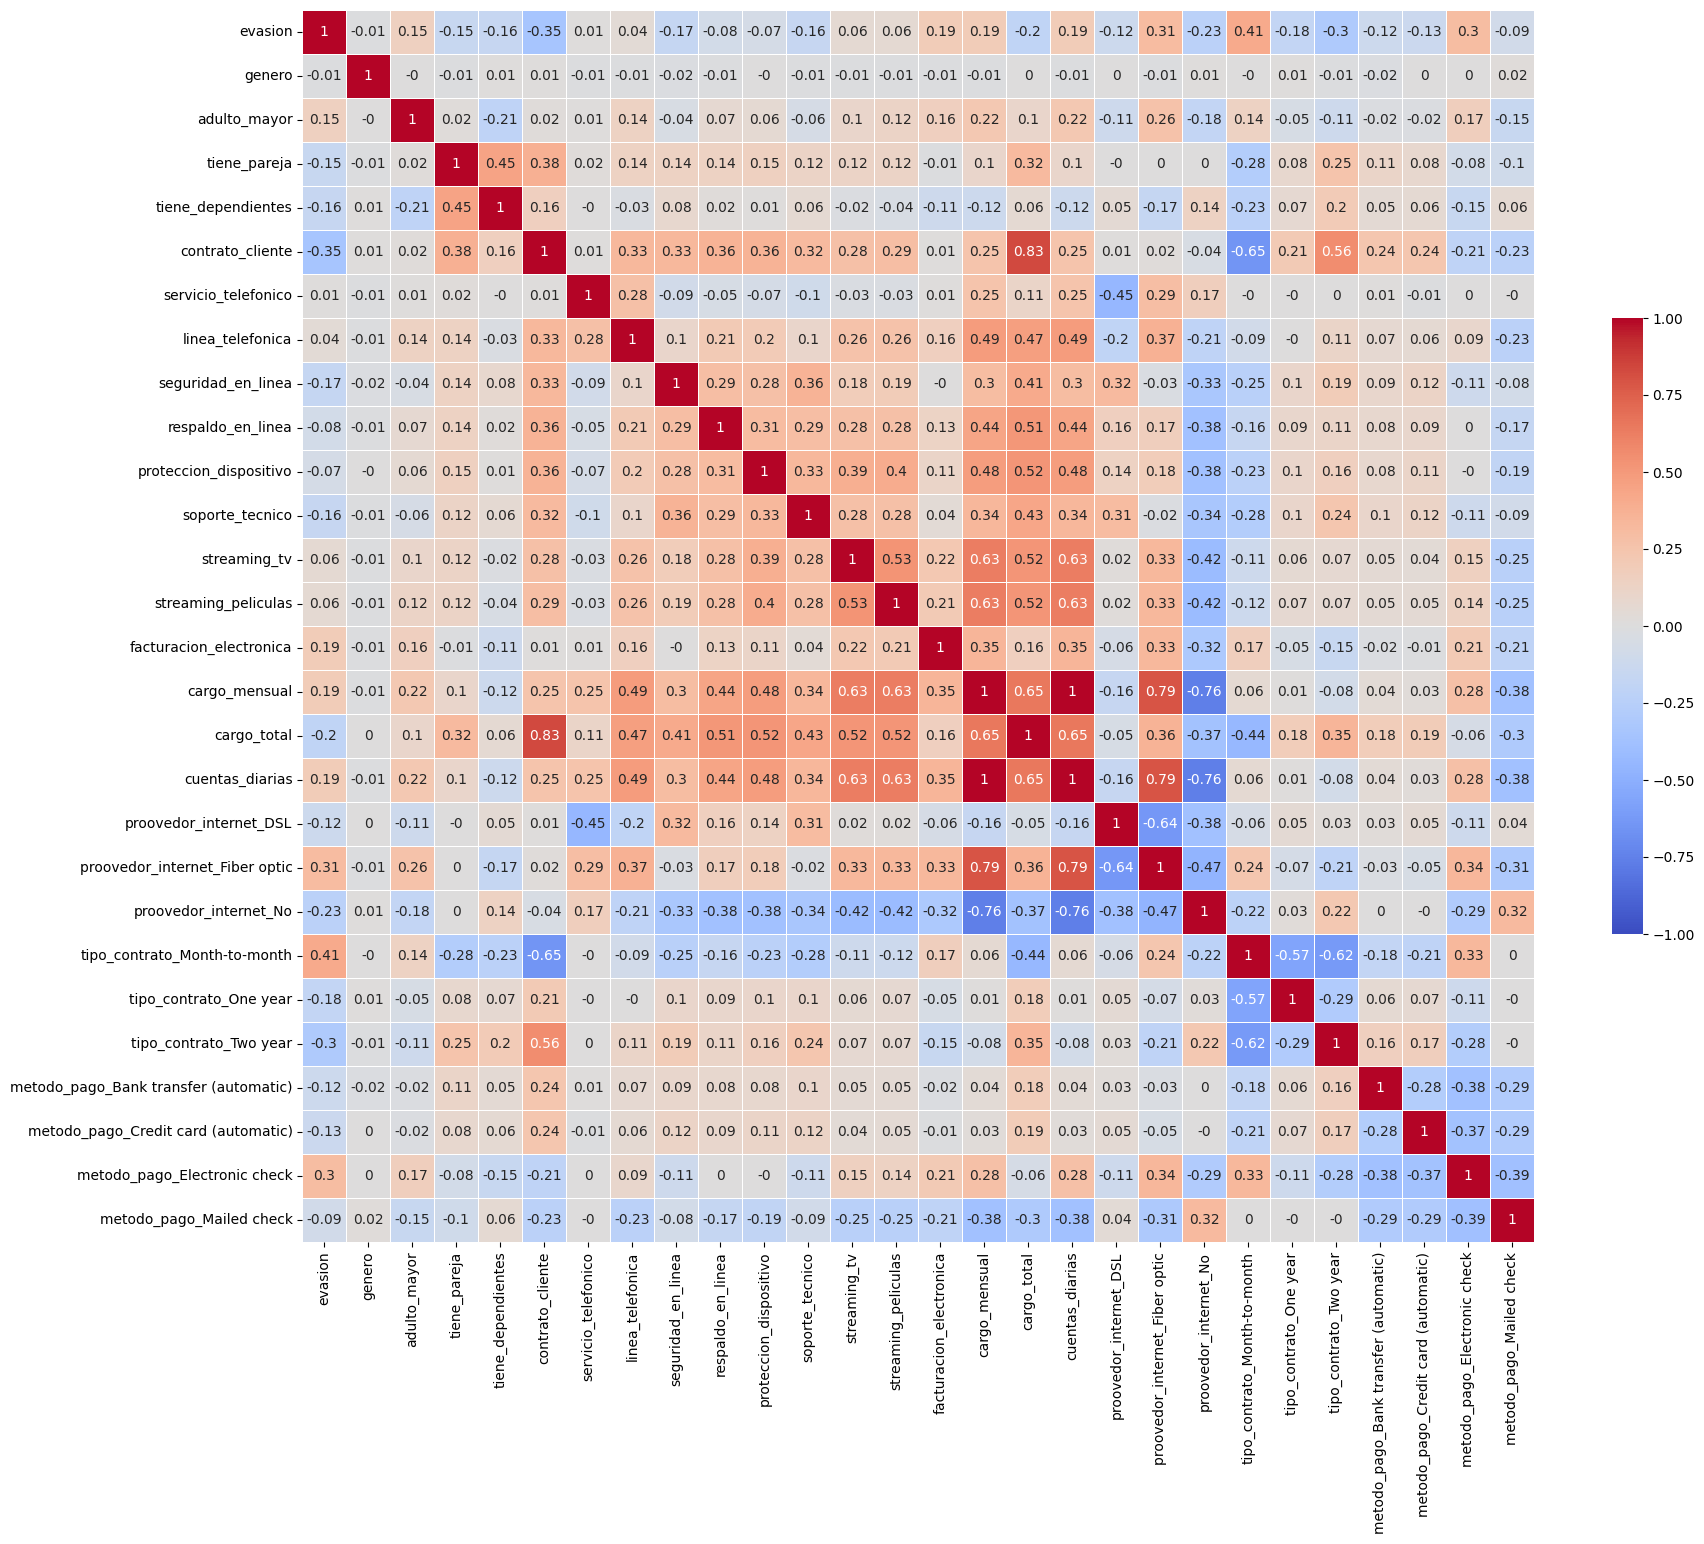

In [658]:
#Utiliza numpy, matplotlib y seaborn

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(
    np.round(corr, 2),
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    annot=True,
    cbar_kws={"shrink": .5},
    cmap="coolwarm"  # Aquí cambias el color
)
plt.show()